# Atividade Estatística

## Informações Iniciais
- Análise estatística do banco de dados 'pinguins.csv' com o intuito de compreender e praticar os ensinamentos vistos em sala sobre Regressão Linear
- O banco de dados foi extraido do pacote 'dados' do R, seguindo as instruções da professora
- Variável Resposta = **'flipper_length_mm'**

## Carregando os dados e Importando pacotes

In [1]:
#manipulação dos dados
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#divisão da base de dados entre treino e teste
from sklearn.model_selection import train_test_split

#modelos de regressao linear
import sklearn
import statsmodels.api as sm

#avaliação e perfomance do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#carregando a base de dados
dados = pd.read_csv('pinguins.csv', sep=';')

In [3]:
type(dados)

pandas.core.frame.DataFrame

Aqui vemos o tipo de variavel que foi instaciada, um DataFrame pandas, que é equivalente a uma tabela excel

In [4]:
dados.shape

(344, 8)

Aqui temos uma visão inicial do que temos pela frente, uma "tabela" com 344 linhas e 9 colunas

In [5]:
dados.columns

Index(['especie', 'ilha', 'comprimento_bico', 'profundidade_bico',
       'comprimento_nadadeira', 'massa_corporal', 'sexo', 'ano'],
      dtype='object')

Aqui vemos todas as colunas do df, que nada mais são do que as variáveis a serem analisadas:
- especie: variavel qualitativa nominal que descreve a especie do pinguim
- ilha: variavel qualitativa nominal que descreve a ilha em que foi localizado o pinguim
- comprimento_bico: variavel quantitiva discreta que mede o comprimento do bico do pinguim em milimetros
- profundidade_bico: variavel quantitiva discreta que mede a expessura do bico do pinguim em milimetros
- comprimento_nadadeira: variavel quantitativa discreta que mede o tamanho da nadadeira do pinguim em milimetros
- massa_corporal: varaivel quantitativa discreta que mede o peso corporal do pinguim em gramas
- sexo: variavel qualitativa nominal que descreve o sexo do pinguim
- ano: variavel qualitativa que mostra o ano do estudo

## Tratamento dos dados

In [6]:
dados.head()

,especie,ilha,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,sexo,ano
1,Pinguim-de-adélia,Torgersen,"39,1","18,7",181.0,3750.0,macho,2007
2,Pinguim-de-adélia,Torgersen,"39,5","17,4",186.0,3800.0,fêmea,2007
3,Pinguim-de-adélia,Torgersen,"40,3",18,195.0,3250.0,fêmea,2007
4,Pinguim-de-adélia,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Pinguim-de-adélia,Torgersen,"36,7","19,3",193.0,3450.0,fêmea,2007


usamos o metodo 'head()' para retornar as 5 primeiras linhas da tabela e termos uma ideia do seu esqueleto

### Verificar e tratar valores faltantes

Quase sempre nossos bancos de dados irão vir com dados faltando ou algum outro tipo de erro. Cabe ao analista de dados tratar esses erros para prosseguir com um df completo e sem erros

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   especie                344 non-null    object 
 1   ilha                   344 non-null    object 
 2   comprimento_bico       342 non-null    object 
 3   profundidade_bico      342 non-null    object 
 4   comprimento_nadadeira  342 non-null    float64
 5   massa_corporal         342 non-null    float64
 6   sexo                   333 non-null    object 
 7   ano                    344 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 24.2+ KB


Aqui vemos que temos duas variaveis quantitativas que não estão no tipo adequado
- 'comprimento_bico'
- 'profundidade_bico'  
Iremos tratar essas variaveis para ela apresentar valores numericos

In [8]:
dados['comprimento_bico'] = pd.to_numeric(dados['comprimento_bico'].str.replace(',','.'))
dados['profundidade_bico'] = pd.to_numeric(dados['profundidade_bico'].str.replace(',','.'))

tratamos os dados tranformando em tipos numéricos e substituindo a ',' pelo '.' pois a sintaxe python aceita apenas o '.' como separador de digitos

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   especie                344 non-null    object 
 1   ilha                   344 non-null    object 
 2   comprimento_bico       342 non-null    float64
 3   profundidade_bico      342 non-null    float64
 4   comprimento_nadadeira  342 non-null    float64
 5   massa_corporal         342 non-null    float64
 6   sexo                   333 non-null    object 
 7   ano                    344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


Podemos observar que agora, todos os variaveis quantitativas tem um tipo adequado

Usando o método 'info()' vamos saber o tipo de dado de cada coluna junto com o numero de dados faltando
- observamos que o df tem 344 entradas e muitas colunas não possuem o mesmo numero de valores nao nulos
- Para termos uma visão mais detalhas vamos usar outro tipo de visualização

In [10]:
dados.isna().sum()

especie                   0
ilha                      0
comprimento_bico          2
profundidade_bico         2
comprimento_nadadeira     2
massa_corporal            2
sexo                     11
ano                       0
dtype: int64

aqui usamos o metodo 'isna()' para localizar os valores NaN em cada coluna e o método 'sum()' para somar todas as aparições e retornar o valor final por coluna

In [11]:
dados.dropna(axis=0, inplace=True)

utilizando o metodo 'dropna()' passando os parametros '0' e 'True' para remover todas as linhas com dados faltantes
- axis=0 determina o eixo que deve ser apagado, nesse caso apagamos as linhas
- inplace=True salva as alterações no proprio dataframe sem precisarmos criar outro

Usamos novamente 'isna().sum()' e percebemos que todos os dados foram tratados


In [12]:
dados.isna().sum()

especie                  0
ilha                     0
comprimento_bico         0
profundidade_bico        0
comprimento_nadadeira    0
massa_corporal           0
sexo                     0
ano                      0
dtype: int64

In [13]:
dados.shape

(333, 8)

Agora nosso df tem 333 linhas das 344 iniciais, ou seja 11 linhas foram removidas.
- Ou seja o **tamanho da amostra é de 333**

## Resumo Estatístico

In [14]:
dados.describe()

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,ano
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Usamos o metodo 'describe()' para exibir informaçoes estatisticas do df, como por exemplo:
- count: numero de registros, importante para sabermos o tamanho da amostra
- mean: media aritmética, devemos ficar atentos ao que ela representa, pois o resultando nem sempre reflete a realidade.
- std: desvio padrao, como os dados se dispersam em relação a média
- min: valor minimo, os valores min e max nos auxiliam para identificar a amplitude da amostra
- 25%: primeiro quartil, os quartis sao valores que nos mostram de que forma os dados estao distribuidos
- 50%: segundo quartil (**ou mediana**)
- 75%: terceiro quartil
- max: valor maximo

Obs: Podemos observar que apenas as váriaveis quantitativas foram retornadas

- A intenção ao usar o 'describe()' é observar, de maneira geral, se há algum valor fora do padrão e se os dados estão dispersos da médiana.

## Visualização inicial dos dados

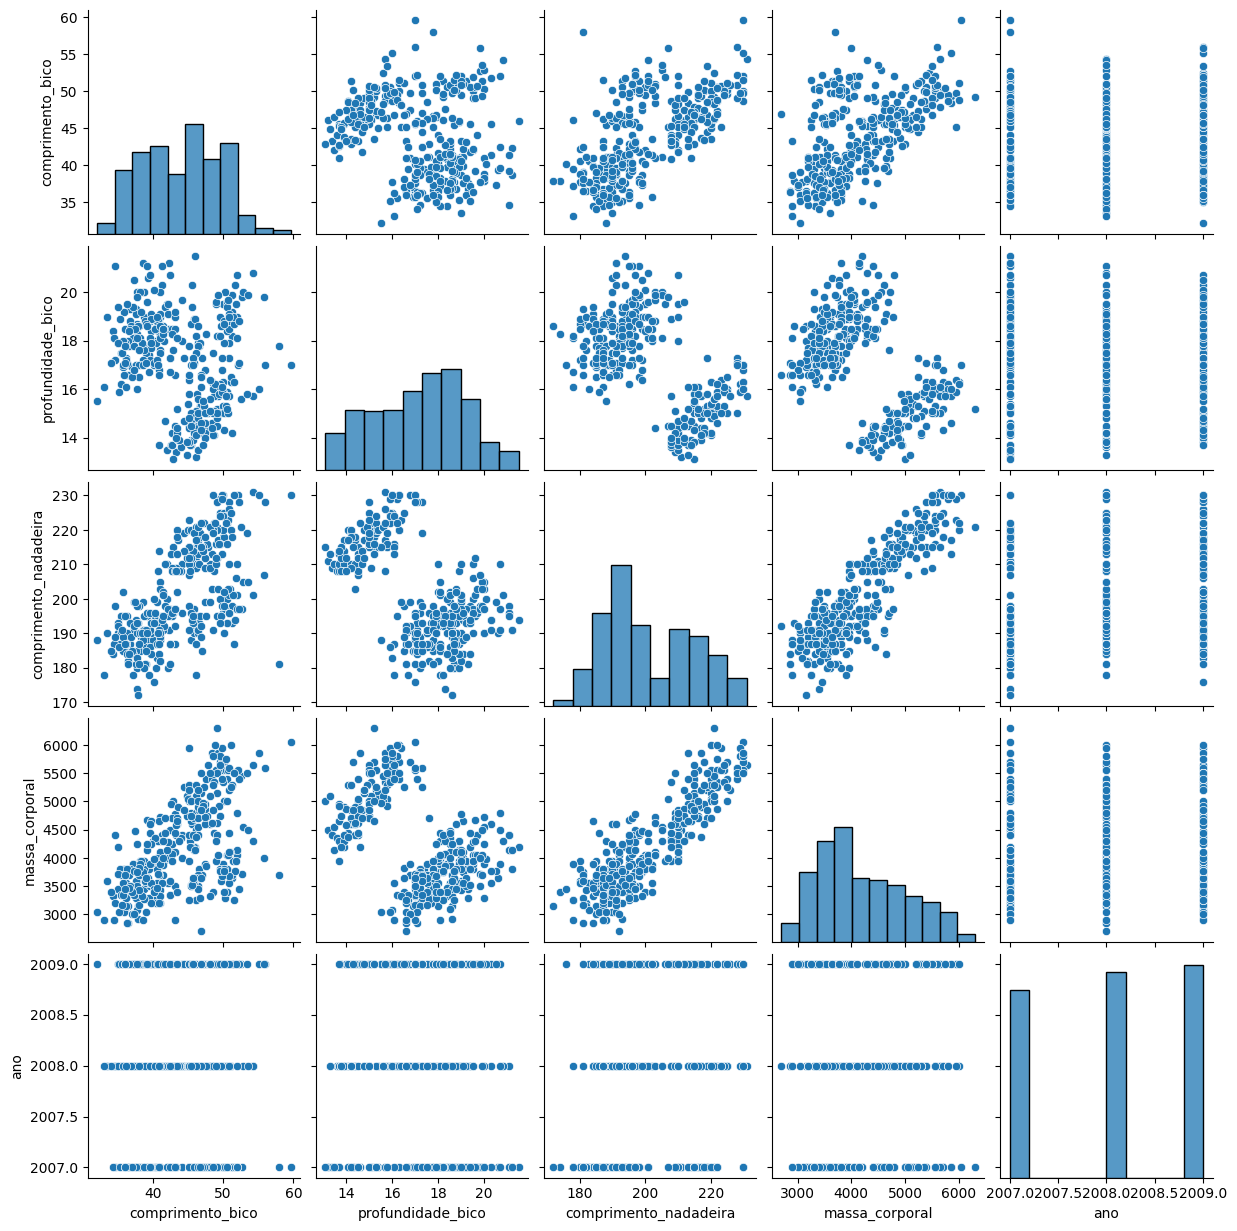

In [15]:
sns.pairplot(dados)

Plotamos todos os graficos em busca de uma correlação que aparente ser linear com a variavel resposta

Vemos que a variavel mais provavel a ter uma corrrelação linear com 'comprimento_nadadeira é 'massa_corporal'  
Para ter certeza, iremos fazer a matriz de correlação

## Correlação entre as variáveis

- Como temos variaveis qualitativas que podem influenciar na variavel resposta precisamos converter as variaveis.
- Para fazer isso usaremos o método de Codificação One-Hot no qual cada categoria qualitativa é transformada em uma nova variavel binária.

In [16]:
dados_encoded = pd.get_dummies(dados, columns=['especie', 'ilha', 'sexo'])

In [17]:
correlacao = dados_encoded.corr(method='pearson')
correlacao

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,ano,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo,ilha_Biscoe,ilha_Dream,ilha_Torgersen,sexo_fêmea,sexo_macho
comprimento_bico,1.000000,-0.228626,0.653096,0.589451,0.032657,-0.836409,0.449098,0.488256,0.225174,0.032118,-0.367821,-0.344078,0.344078
profundidade_bico,-0.228626,1.000000,-0.577792,-0.472016,-0.048182,0.531342,0.323505,-0.822293,-0.626230,0.457326,0.265173,-0.372673,0.372673
comprimento_nadadeira,0.653096,-0.577792,1.000000,0.872979,0.151068,-0.685947,-0.186175,0.866854,0.601126,-0.425459,-0.273304,-0.255169,0.255169
massa_corporal,0.589451,-0.472016,0.872979,1.000000,0.021862,-0.550479,-0.298622,0.821178,0.623702,-0.464666,-0.251369,-0.424987,0.424987
ano,0.032657,-0.048182,0.151068,0.021862,1.000000,0.013882,-0.044591,0.023137,0.052894,-0.047304,-0.010370,0.000467,-0.000467
especie_Pinguim-de-adélia,-0.836409,0.531342,-0.685947,-0.550479,0.013882,1.000000,-0.447597,-0.658904,-0.332518,0.013443,0.458786,0.007961,-0.007961
especie_Pinguim-de-barbicha,0.449098,0.323505,-0.186175,-0.298622,-0.044591,-0.447597,1.000000,-0.377744,-0.496022,0.661894,-0.205351,0.004564,-0.004564
especie_Pinguim-gentoo,0.488256,-0.822293,0.866854,0.821178,0.023137,-0.658904,-0.377744,1.000000,0.761548,-0.570702,-0.302296,-0.012082,0.012082
ilha_Biscoe,0.225174,-0.626230,0.601126,0.623702,0.052894,-0.332518,-0.496022,0.761548,1.000000,-0.749398,-0.396949,-0.009201,0.009201
ilha_Dream,0.032118,0.457326,-0.425459,-0.464666,-0.047304,0.013443,0.661894,-0.570702,-0.749398,1.000000,-0.310248,0.000673,-0.000673


Para facilitar a visuzalição construimos um heatmap com a tabela de correlação

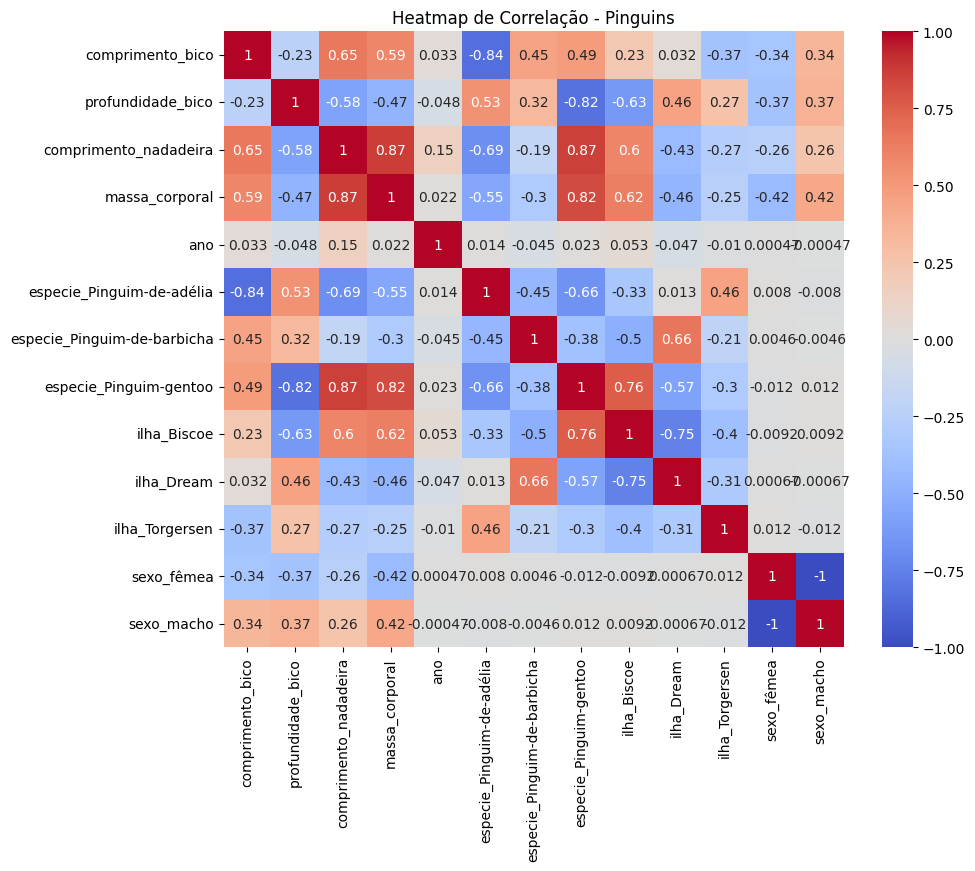

In [18]:
# Plotar o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - Pinguins')
plt.show()

In [25]:
y1 = dados_encoded['comprimento_nadadeira']

x1 = dados_encoded.drop(['comprimento_nadadeira'], axis=1)
sm.add_constant(x1)

,const,comprimento_bico,profundidade_bico,massa_corporal,ano,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo,ilha_Biscoe,ilha_Dream,ilha_Torgersen,sexo_fêmea,sexo_macho
1,1.0,39.1,18.7,3750.0,2007,1,0,0,0,0,1,0,1
2,1.0,39.5,17.4,3800.0,2007,1,0,0,0,0,1,1,0
3,1.0,40.3,18.0,3250.0,2007,1,0,0,0,0,1,1,0
5,1.0,36.7,19.3,3450.0,2007,1,0,0,0,0,1,1,0
6,1.0,39.3,20.6,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1.0,55.8,19.8,4000.0,2009,0,1,0,0,1,0,0,1
341,1.0,43.5,18.1,3400.0,2009,0,1,0,0,1,0,1,0
342,1.0,49.6,18.2,3775.0,2009,0,1,0,0,1,0,0,1
343,1.0,50.8,19.0,4100.0,2009,0,1,0,0,1,0,0,1


Divisao dos dados em base de treino e de base de teste com proporção de 70:30

In [26]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=1)

## Treinando modelo

In [27]:
modelo1 = sm.OLS(y1_train, x1_train)
treino1 = modelo1.fit()

In [28]:
treino1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     comprimento_nadadeira   R-squared:                       0.887
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     195.0
Date:                   Mon, 29 Apr 2024   Prob (F-statistic):          1.81e-100
Time:                           21:08:58   Log-Likelihood:                -693.34
No. Observations:                    233   AIC:                             1407.
Df Residuals:                        223   BIC:                             1441.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
comprimento_bico                0.1581      0.143      1.103      0.271      -0.124       0.441
profundidade_bico               1.1678      0.390      2.994      0.003       0.399       1.937
massa_corporal                  0.0049      0.001      4.646      0.000       0.003       0.007
ano                             2.4444      0.394      6.206      0.000       1.668       3.221
especie_Pinguim-de-adélia   -1368.4890    226.168     -6.051      0.000   -1814.189    -922.789
especie_Pinguim-de-barbicha -1363.0782    226.007     -6.031      0.000   -1808.460    -917.696
especie_Pinguim-gentoo      -1344.2060    225.951     -5.949      0.000   -1789.478    -898.934
ilha_Biscoe                 -1359.4065    226.052     -6.014      0.000   -1804.878    -913.935
ilha_Dream                  -1358.8603    226.039     -6.012      0.000   -1804.306    -913.415
ilha_Torgersen              -1357.5063    226.025     -6.006      0.000   -1802.925    -912.088
sexo_fêmea                  -2038.3875    339.052     -6.012      0.000   -2706.544   -1370.231
sexo_macho                  -2037.3857    339.061     -6.009      0.000   -2705.560   -1369.211
==============================================================================
Omnibus:                        3.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.945
Skew:                          -0.157   Prob(JB):                        0.139
Kurtosis:                       3.555   Cond. No.                     7.77e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.53e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Analise de resultados

A partir do primeiro ajuste do modelo podemos concluir algumas coisas:
- A variavel ano, que apenas denota o ano em que a consulta foi feita não correlaciona em nada com nenhuma variavel por isso podemos retira-la da analise
- a variavel 'comprimento_bico' apesar de ter correlação alta, não é estatisticamente significativo pois ao analisarmos o p > |t| de 0.271 é muito maior que o limte de 0.005, entao retiramos a variavel da analise
- o grafico feito no inicio entre 'comprimento_nadadeira' e 'massa_corporal' não condiz com o coeficiente mostrado no summary, isso se deve provavelmente a um problema de escala, trataremos isso adiante

## Tratamento de erros

retirando as colunas 'ano' e 'comprimento_bico'

In [31]:
y2 = dados_encoded['comprimento_nadadeira']

x2 = dados_encoded.drop(['comprimento_nadadeira', 'ano', 'comprimento_bico'], axis=1)

sm.add_constant(x2)

,const,profundidade_bico,massa_corporal,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo,ilha_Biscoe,ilha_Dream,ilha_Torgersen,sexo_fêmea,sexo_macho
1,1.0,18.7,3750.0,1,0,0,0,0,1,0,1
2,1.0,17.4,3800.0,1,0,0,0,0,1,1,0
3,1.0,18.0,3250.0,1,0,0,0,0,1,1,0
5,1.0,19.3,3450.0,1,0,0,0,0,1,1,0
6,1.0,20.6,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
340,1.0,19.8,4000.0,0,1,0,0,1,0,0,1
341,1.0,18.1,3400.0,0,1,0,0,1,0,1,0
342,1.0,18.2,3775.0,0,1,0,0,1,0,0,1
343,1.0,19.0,4100.0,0,1,0,0,1,0,0,1


Tratando a escala dos valores

In [32]:
scaler = sklearn.preprocessing.StandardScaler()
x2_scaled = scaler.fit_transform(x2)

x = sm.add_constant(x2)

In [34]:
# Divisão dos dados em Treino e Teste 70:30
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=1)

treino 2

In [35]:
modelo2 = sm.OLS(y2_train, x2_train)
treino2 = modelo2.fit()

In [36]:
treino2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     comprimento_nadadeira   R-squared:                       0.867
Model:                               OLS   Adj. R-squared:                  0.862
Method:                    Least Squares   F-statistic:                     208.7
Date:                   Mon, 29 Apr 2024   Prob (F-statistic):           1.19e-94
Time:                           21:13:25   Log-Likelihood:                -713.01
No. Observations:                    233   AIC:                             1442.
Df Residuals:                        225   BIC:                             1470.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
profundidade_bico               1.0079      0.418      2.411      0.017       0.184       1.832
massa_corporal                  0.0053      0.001      4.691      0.000       0.003       0.008
especie_Pinguim-de-adélia      35.7867      2.541     14.083      0.000      30.779      40.794
especie_Pinguim-de-barbicha    42.5209      2.723     15.618      0.000      37.156      47.886
especie_Pinguim-gentoo         60.3704      2.545     23.719      0.000      55.355      65.386
ilha_Biscoe                    45.5045      2.375     19.159      0.000      40.824      50.185
ilha_Dream                     45.8990      2.335     19.654      0.000      41.297      50.501
ilha_Torgersen                 47.2745      2.406     19.647      0.000      42.533      52.016
sexo_fêmea                     68.6090      3.002     22.852      0.000      62.693      74.525
sexo_macho                     70.0690      3.802     18.427      0.000      62.576      77.562
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.790
Skew:                          -0.096   Prob(JB):                        0.674
Kurtosis:                       3.211   Cond. No.                     6.89e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.92e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

agora vou tirar profundidade_bico

In [38]:
y3 = dados_encoded['comprimento_nadadeira']

x3 = dados_encoded.drop(['comprimento_nadadeira', 'ano', 'comprimento_bico', 'profundidade_bico'], axis=1)

sm.add_constant(x3)

,const,massa_corporal,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo,ilha_Biscoe,ilha_Dream,ilha_Torgersen,sexo_fêmea,sexo_macho
1,1.0,3750.0,1,0,0,0,0,1,0,1
2,1.0,3800.0,1,0,0,0,0,1,1,0
3,1.0,3250.0,1,0,0,0,0,1,1,0
5,1.0,3450.0,1,0,0,0,0,1,1,0
6,1.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
340,1.0,4000.0,0,1,0,0,1,0,0,1
341,1.0,3400.0,0,1,0,0,1,0,1,0
342,1.0,3775.0,0,1,0,0,1,0,0,1
343,1.0,4100.0,0,1,0,0,1,0,0,1


In [39]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=1)

treino 3

In [40]:
modelo3 = sm.OLS(y3_train, x3_train)
treino3 = modelo3.fit()

In [41]:
treino3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     comprimento_nadadeira   R-squared:                       0.863
Model:                               OLS   Adj. R-squared:                  0.859
Method:                    Least Squares   F-statistic:                     237.4
Date:                   Mon, 29 Apr 2024   Prob (F-statistic):           1.29e-94
Time:                           21:16:42   Log-Likelihood:                -715.98
No. Observations:                    233   AIC:                             1446.
Df Residuals:                        226   BIC:                             1470.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
massa_corporal                  0.0058      0.001      5.167      0.000       0.004       0.008
especie_Pinguim-de-adélia      41.4876      0.941     44.078      0.000      39.633      43.342
especie_Pinguim-de-barbicha    48.3802      1.241     38.992      0.000      45.935      50.825
especie_Pinguim-gentoo         61.9523      2.485     24.928      0.000      57.055      66.850
ilha_Biscoe                    49.9368      1.520     32.854      0.000      46.942      52.932
ilha_Dream                     50.2576      1.494     33.634      0.000      47.313      53.202
ilha_Torgersen                 51.6257      1.609     32.095      0.000      48.456      54.795
sexo_fêmea                     74.6183      1.692     44.107      0.000      71.285      77.952
sexo_macho                     77.2018      2.414     31.977      0.000      72.444      81.959
==============================================================================
Omnibus:                        0.927   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.656
Skew:                          -0.104   Prob(JB):                        0.721
Kurtosis:                       3.155   Cond. No.                     1.04e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

plotando grafico

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given